In [ ]:
import pandas as pd

# Load datasets
dataset1 = pd.read_csv('/content/DATASET4.csv')

# Display the first few rows of each dataset
print("Dataset 1:")
print(dataset1.head())

Dataset 1:
                                           statement  label
0  Tanzanian club spokesman Haji S Manara was inf...      0
1              dr fauci sat microsoft board director      0
2  NEWS UK safe from coronavirus as Boris Johnson...      0
3  Does vaping reduce your chances of getting the...      0
4  WHO eu_echo Canada  DFID_UK joined forces to s...      1


In [ ]:
# Rename the column
dataset1 = dataset1.rename(columns={'value': 'label'})

In [ ]:
# Count values for 'label' column in each dataset
label_counts_dataset1 = dataset1['label'].value_counts()


# Display counts
print("Label counts for Dataset 1:")
print(label_counts_dataset1)

Label counts for Dataset 1:
label
0    1307
1     252
Name: count, dtype: int64


In [ ]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
DATASET1= dataset1.copy()

In [ ]:
# Function to remove HTML contents
def remove_html(statement):
    soup = BeautifulSoup(statement, "html.parser")
    return soup.get_text()

# Function to remove punctuation marks
def remove_punctuations(statement):
    return re.sub('\[[^]]*\]', '', statement)

# Function to remove special characters
def remove_characters(statement):
    return re.sub("[^a-zA-Z]"," ", statement)

# Function to remove stopwords and perform lemmatization
def remove_stopwords_and_lemmatization(statement):
    final_statement = []
    statement = statement.lower()
    statement = nltk.word_tokenize(statement)

    for word in statement:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_statement.append(word)
    return " ".join(final_statement)

# Total cleaning function
def cleaning(statement):
    statement = remove_html(statement)
    statement = remove_punctuations(statement)
    statement = remove_characters(statement)
    statement = remove_stopwords_and_lemmatization(statement)
    statement = to_lowercase(statement)
    return statement

def remove_urls(text):
    url_pattern = re.compile(r'http\S+|www\S+|https\S+', re.IGNORECASE)
    return url_pattern.sub(r'', text)

# Function to convert text to lowercase
def to_lowercase(text):
    return text.lower()

def remove_http_and_following(text):
    # Compile the regex pattern
    pattern = re.compile(r'http.*', re.IGNORECASE)
    # Substitute the matched text with an empty string
    return pattern.sub('', text)

# Function to remove hashtags and mentions
def remove_hashtags_mentions(text):
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    return text

# Function to remove special characters and HTML entities
def clean_text(text):
    # Remove HTML entities
    text = BeautifulSoup(text, "html.parser").text
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text



# Apply the cleaning and URL removal functions on the 'statement' column of Dataset2


DATASET1['statement'] = DATASET1['statement'].apply(remove_urls)
DATASET1['statement'] = DATASET1['statement'].apply(cleaning)

<ipython-input-7-54670398adf4>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(statement, "html.parser")


In [ ]:
DATASET1.head(50)

,statement,label
0,hospital murdered patient remdesivir drug bann...,0
1,pfizer ceo albert bourla admitted yesterday co...,0
2,th circuit court appeal ruled covid vax mandat...,0
3,world health organization discussing ending fi...,0
4,covid vaccine injury exposed newly uncovered data,0
5,notice new jersey doctor office prof covid vac...,0
6,world health organization pandemic accord woul...,0
7,say donald trump told american inject bleach t...,0
8,study found sunbathing increase risk heart dis...,0
9,al cdc lo le tom o estar de acuerdo con te ric...,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Convert all data in 'statement' column to strings
dataset1['statement'] = dataset1['statement'].astype(str)

# Prepare data
X = dataset1['statement']
y = dataset1['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams


In [ ]:
pipeline = make_pipeline(
    tfidf_vectorizer,
    PassiveAggressiveClassifier(max_iter=50, random_state=42)
)


In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('passiveaggressiveclassifier',
                 PassiveAggressiveClassifier(max_iter=50, random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1230
           1       0.90      0.92      0.91      1166

    accuracy                           0.91      2396
   macro avg       0.91      0.91      0.91      2396
weighted avg       0.91      0.91      0.91      2396



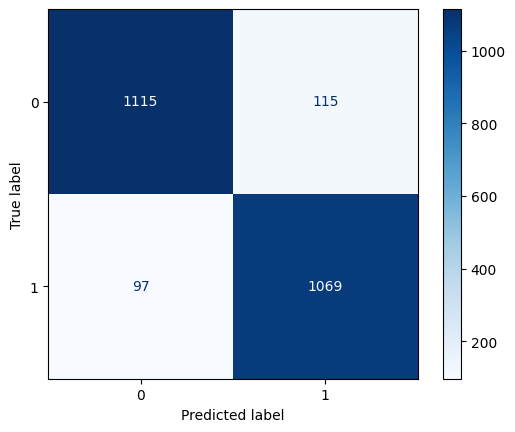

In [ ]:
# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [ ]:
from sklearn.svm import SVC

pipeline = make_pipeline(
    tfidf_vectorizer,
    SVC(kernel='linear', random_state=42)
)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1230
           1       0.91      0.91      0.91      1166

    accuracy                           0.91      2396
   macro avg       0.91      0.91      0.91      2396
weighted avg       0.91      0.91      0.91      2396



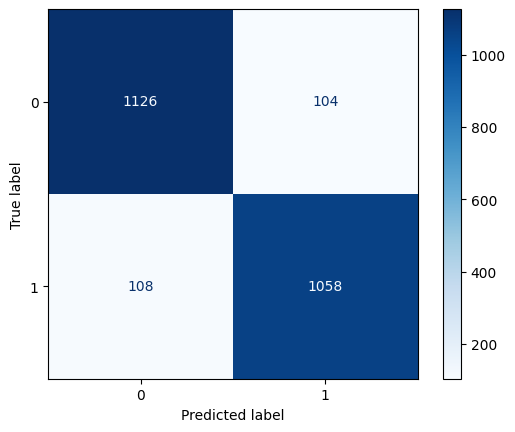

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(
    tfidf_vectorizer,
    LogisticRegression(random_state=42)
)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1230
           1       0.90      0.89      0.89      1166

    accuracy                           0.90      2396
   macro avg       0.90      0.90      0.90      2396
weighted avg       0.90      0.90      0.90      2396



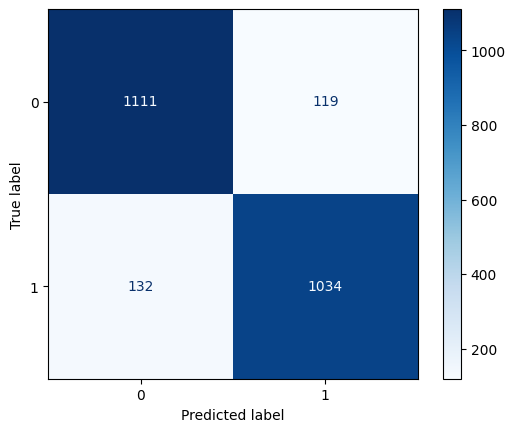

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    tfidf_vectorizer,
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:44:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1230
           1       0.91      0.82      0.86      1166

    accuracy                           0.87      2396
   macro avg       0.88      0.87      0.87      2396
weighted avg       0.87      0.87      0.87      2396



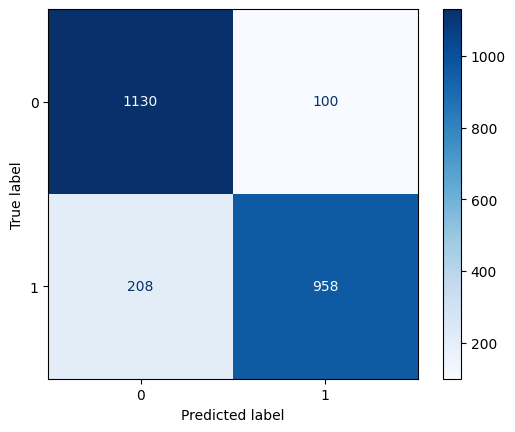

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    tfidf_vectorizer,
    RandomForestClassifier(random_state=42)
)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      1230
           1       0.92      0.80      0.86      1166

    accuracy                           0.87      2396
   macro avg       0.88      0.87      0.87      2396
weighted avg       0.88      0.87      0.87      2396



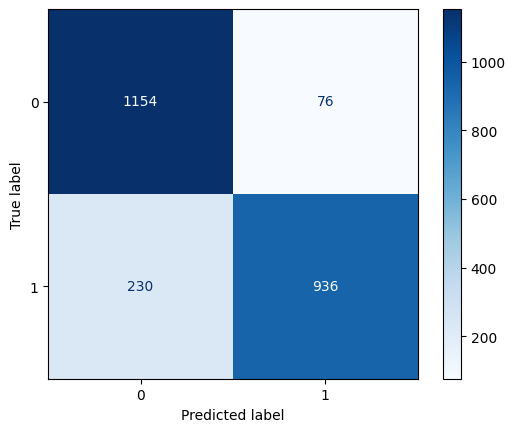

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
from sklearn.naive_bayes import MultinomialNB

pipeline = make_pipeline(
    tfidf_vectorizer,
    MultinomialNB()
)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.89      1230
           1       0.87      0.93      0.90      1166

    accuracy                           0.89      2396
   macro avg       0.90      0.90      0.89      2396
weighted avg       0.90      0.89      0.89      2396



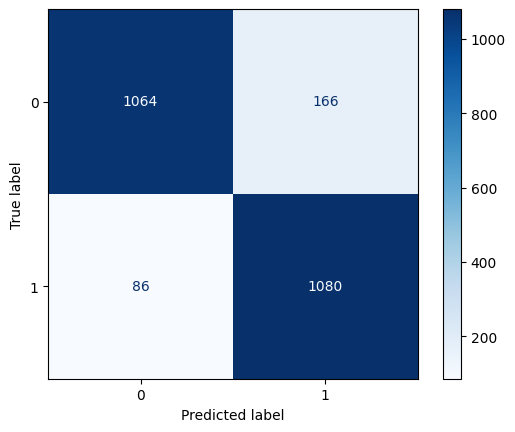

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
from sklearn.ensemble import VotingClassifier
# Define models
pa_clf = PassiveAggressiveClassifier(max_iter=50, random_state=42)
svc_clf = SVC(kernel='linear', probability=True, random_state=42)  # `probability=True` for soft voting
logreg_clf = LogisticRegression(max_iter=1000, random_state=42)

# Hard Voting
hard_voting_clf = VotingClassifier(
    estimators=[
        ('pa', pa_clf),
        ('svc', svc_clf),
        ('logreg', logreg_clf)
    ],
    voting='hard'
)



In [ ]:
# Build pipelines
hard_voting_pipeline = make_pipeline(
    tfidf_vectorizer,
    hard_voting_clf
)




Hard Voting Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      1230
           1       0.91      0.91      0.91      1166

    accuracy                           0.91      2396
   macro avg       0.91      0.91      0.91      2396
weighted avg       0.91      0.91      0.91      2396



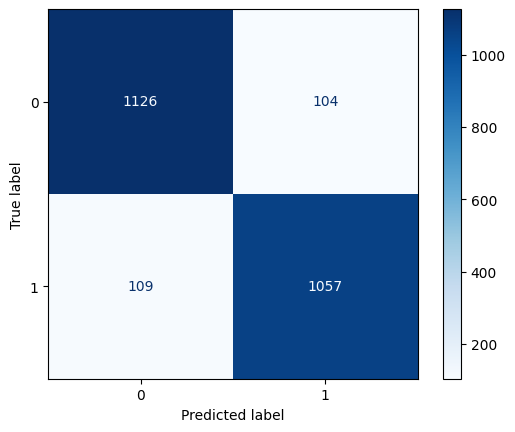

In [ ]:
# Train and evaluate Hard Voting
hard_voting_pipeline.fit(X_train, y_train)
y_pred_hard = hard_voting_pipeline.predict(X_test)
print("Hard Voting Classification Report:\n", classification_report(y_test, y_pred_hard))
cm_hard = confusion_matrix(y_test, y_pred_hard)
disp_hard = ConfusionMatrixDisplay(confusion_matrix=cm_hard)
disp_hard.plot(cmap='Blues')